# __Mini-Teste 5: Quantização de Imagens com Clusterização__

#### Equipe:
    -- Ana Gabriela
    -- Emanuel
    -- Lucas
    -- Nicoli

### Passo 1: Importação de bibliotecas úteis

In [1]:
import mahotas as mh
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

%matplotlib inline

### Passo 2: Leitura de imagens

In [6]:
img1_path = 'lichtenstein.png'
img2_path = 'pintinho.jpg'

##### __Tamanho inicial do arquivo da imagem em kB__

In [104]:
def infos_img(img_path):
    statinfo = os.stat(img_path)
    return statinfo.st_size >> 10

##### __Leitura da Imagem__

In [109]:
def ler_img_original(img_path):
    print('Tamanho da imagem ', img_path, ': ', infos_img(img_path), 'kB')
    img = mh.imread(img_path)
    plt.imshow(img)
    return img

Tamanho da imagem  lichtenstein.png :  347 kB


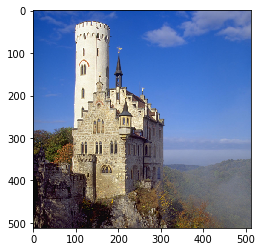

In [110]:
img_lich = ler_img_original(img1_path)

Tamanho da imagem  pintinho.jpg :  48 kB


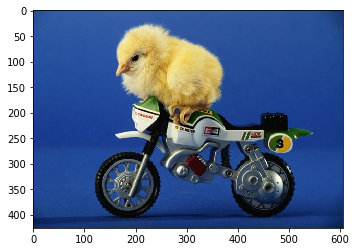

In [111]:
img_pintinho = ler_img_original(img2_path)

### Passo 3: Clusterização

In [48]:
def clusterizacao(X, n_clusters):
    model = KMeans(n_clusters) #instanciação
    marcacoes = model.fit_predict(X) # retorna vetor de dimensão (w * h, ) em que cada célula contém o número da cor que o pixel
                                     # na  posição (i,j) deve ser pintado
    cores = model.cluster_centers_  # retorna lista de cores que representam cada cluster
    return marcacoes, cores

In [54]:
def quantizacao(img, n_cores):
    w, h, d = img.shape
    img_reshape = np.reshape(img, (w * h, d)) #transformar a img em um array (w * h, d) para alimentar ao modelo

    marcacoes, cores = clusterizacao(img_reshape, n_cores)

    img_quantizada = cores[marcacoes].reshape(w,h,d) #pintar a imagem de acordo com os clusters

    return img_quantizada

In [55]:
img_lich_quantizada_16 = quantizacao(img_lich, 16)
img_lich_quantizada_32 = quantizacao(img_lich, 32)
img_lich_quantizada_64 = quantizacao(img_lich, 64)

In [56]:
img_pintinho_quantizada_16 = quantizacao(img_pintinho, 16)
img_pintinho_quantizada_32 = quantizacao(img_pintinho, 32)
img_pintinho_quantizada_64 = quantizacao(img_pintinho, 64)

### Passo 4: Salvar Imagens comprimidas

In [66]:
mh.imsave('img_lich_quantizada_16.jpg', img_lich_quantizada_16.astype(np.uint8))
mh.imsave('img_lich_quantizada_32.jpg', img_lich_quantizada_32.astype(np.uint8))
mh.imsave('img_lich_quantizada_64.jpg', img_lich_quantizada_64.astype(np.uint8))

mh.imsave('img_pintinho_quantizada_16.jpg', img_pintinho_quantizada_16.astype(np.uint8))
mh.imsave('img_pintinho_quantizada_32.jpg', img_pintinho_quantizada_32.astype(np.uint8))
mh.imsave('img_pintinho_quantizada_64.jpg', img_pintinho_quantizada_64.astype(np.uint8))

### Passo 5: Imprimir e verificar tamanho de imagens

Text(0.5,1,'Tamanho Linchtenstein original: 347 kB')

(-0.5, 511.5, 511.5, -0.5)

Text(0.5,1,'Tamanho Linchtenstein 16 clusters: 39 kB')

(-0.5, 511.5, 511.5, -0.5)

Text(0.5,1,'Tamanho Linchtenstein 32 clusters: 39 kB')

(-0.5, 511.5, 511.5, -0.5)

Text(0.5,1,'Tamanho Linchtenstein 64 clusters: 38 kB')

(-0.5, 511.5, 511.5, -0.5)

Text(0.5,1,'Tamanho Pintinho original: 48 kB')

(-0.5, 606.5, 425.5, -0.5)

Text(0.5,1,'Tamanho Pintinho 16 clusters: 31 kB')

(-0.5, 606.5, 425.5, -0.5)

Text(0.5,1,'Tamanho Pintinho 32 clusters: 31 kB')

(-0.5, 606.5, 425.5, -0.5)

Text(0.5,1,'Tamanho Pintinho 64 clusters: 31 kB')

(-0.5, 606.5, 425.5, -0.5)

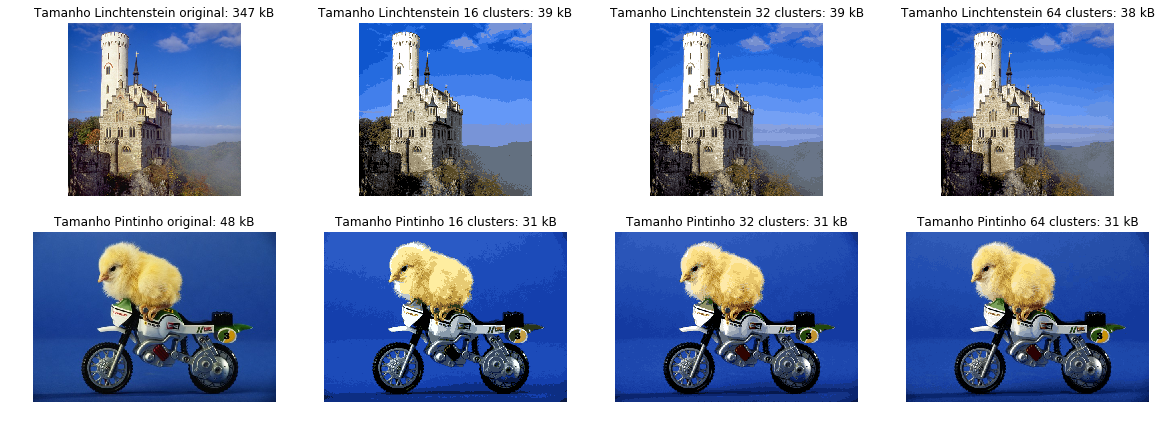

In [124]:
fig, ax = plt.subplots(2,4)
fig.set_size_inches(20, 7)
ax[0,0].imshow(img_lich)
ax[0,0].set_title("Tamanho Linchtenstein original: " + str(infos_img('lichtenstein.png')) + ' kB')
ax[0,0].axis('off')

ax[0,1].imshow(mh.as_rgb(img_lich_quantizada_16[:,:,0], img_lich_quantizada_16[:,:,1], img_lich_quantizada_16[:,:,2]))
ax[0,1].set_title("Tamanho Linchtenstein 16 clusters: " + str(infos_img('img_lich_quantizada_16.jpg')) + ' kB')
ax[0,1].axis('off')

ax[0,2].imshow(mh.as_rgb(img_lich_quantizada_32[:,:,0], img_lich_quantizada_32[:,:,1], img_lich_quantizada_32[:,:,2]))
ax[0,2].set_title("Tamanho Linchtenstein 32 clusters: " + str(infos_img('img_lich_quantizada_32.jpg')) + ' kB')
ax[0,2].axis('off')

ax[0,3].imshow(mh.as_rgb(img_lich_quantizada_64[:,:,0], img_lich_quantizada_64[:,:,1], img_lich_quantizada_64[:,:,2]))
ax[0,3].set_title("Tamanho Linchtenstein 64 clusters: " + str(infos_img('img_lich_quantizada_64.jpg')) + ' kB')
ax[0,3].axis('off')

ax[1,0].imshow(img_pintinho)
ax[1,0].set_title("Tamanho Pintinho original: " + str(infos_img('pintinho.jpg')) + ' kB')
ax[1,0].axis('off')

ax[1,1].imshow(mh.as_rgb(img_pintinho_quantizada_16[:,:,0], img_pintinho_quantizada_16[:,:,1], img_pintinho_quantizada_16[:,:,2]))
ax[1,1].set_title("Tamanho Pintinho 16 clusters: " + str(infos_img('img_pintinho_quantizada_16.jpg')) + ' kB')
ax[1,1].axis('off')

ax[1,2].imshow(mh.as_rgb(img_pintinho_quantizada_32[:,:,0], img_pintinho_quantizada_32[:,:,1], img_pintinho_quantizada_32[:,:,2]))
ax[1,2].set_title("Tamanho Pintinho 32 clusters: " + str(infos_img('img_pintinho_quantizada_32.jpg')) + ' kB')
ax[1,2].axis('off')

ax[1,3].imshow(mh.as_rgb(img_pintinho_quantizada_64[:,:,0], img_pintinho_quantizada_64[:,:,1], img_pintinho_quantizada_64[:,:,2]))
ax[1,3].set_title("Tamanho Pintinho 64 clusters: " + str(infos_img('img_pintinho_quantizada_64.jpg')) + ' kB')
ax[1,3].axis('off')
